In [82]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [83]:
df = pd.read_csv("./data/cs-training.csv")

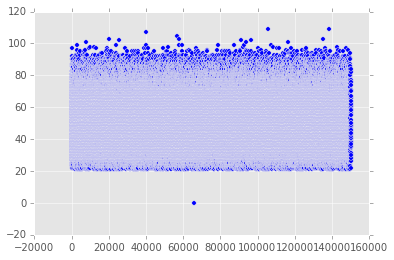

In [84]:
plt.scatter(df['Unnamed: 0'], df.age)

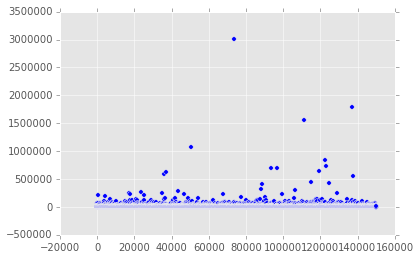

In [85]:
plt.scatter(df['Unnamed: 0'], df.MonthlyIncome)

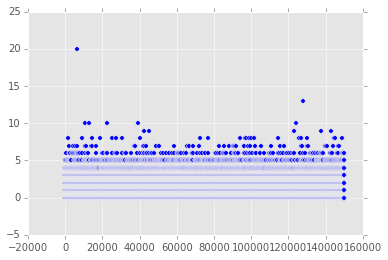

In [86]:
plt.scatter(df['Unnamed: 0'], df.NumberOfDependents)

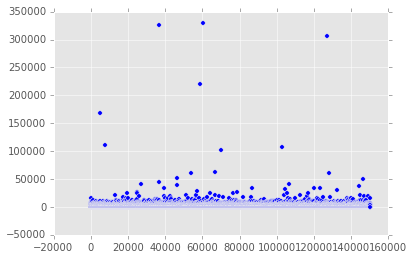

In [87]:
plt.scatter(df['Unnamed: 0'], df.DebtRatio)

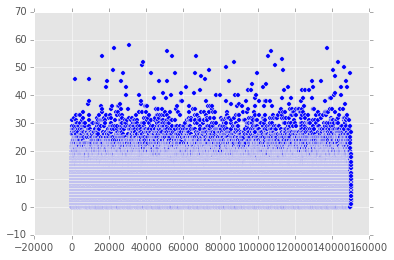

In [88]:
plt.scatter(df['Unnamed: 0'], df.NumberOfOpenCreditLinesAndLoans)

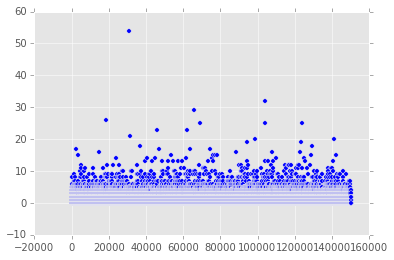

In [89]:
plt.scatter(df['Unnamed: 0'], df['NumberRealEstateLoansOrLines'])

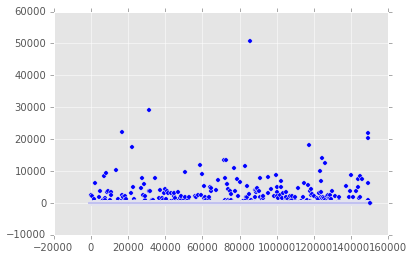

In [90]:
plt.scatter(df['Unnamed: 0'], df['RevolvingUtilizationOfUnsecuredLines'])

Number of values over 80: 269


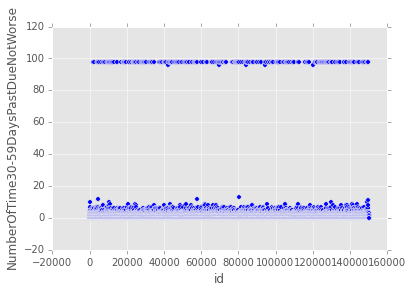

In [91]:
val = 80
col = 'NumberOfTime30-59DaysPastDueNotWorse'
plt.scatter(df[df.columns[0]], df[col])
plt.xlabel('id')
plt.ylabel(col)
print('Number of values over ' + str(val) + ': ' + str(df[df[col] > val].shape[0]))


Number of values over 80: 269


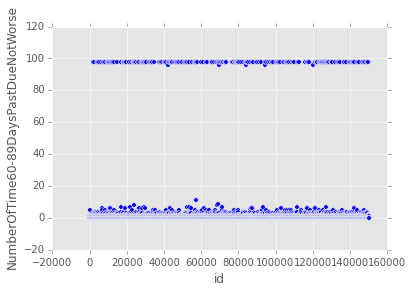

In [92]:
val = 80
col = 'NumberOfTime60-89DaysPastDueNotWorse'
plt.scatter(df[df.columns[0]], df[col])
plt.xlabel('id')
plt.ylabel(col)
print('Number of values over ' + str(val) + ': ' + str(df[df[col] > val].shape[0]))



Number of values over 80: 269


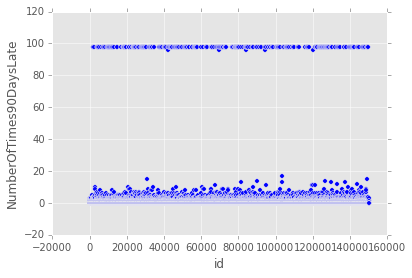

In [93]:
val = 80
col = 'NumberOfTimes90DaysLate'
plt.scatter(df[df.columns[0]], df[col])
plt.xlabel('id')
plt.ylabel(col)
print('Number of values over ' + str(val) + ': ' + str(df[df[col] > val].shape[0]))



In [94]:
df['age'].mean()

52.295206666666665

In [95]:
df['age'].median()

52.0

In [96]:
df['age'].mode()

0    49
dtype: int64

In [97]:
df['age'].skew()

0.18899454512676725

In [98]:
df['age'].max()

109

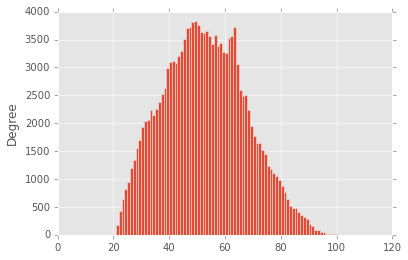

In [99]:
df['age'].plot(kind='hist', bins=df['age'].max())

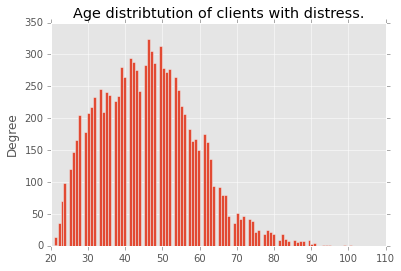

In [100]:
df.loc[df['SeriousDlqin2yrs'] == 1]['age'].plot(
    kind='hist', 
    bins=100, 
    title='Age distribtution of clients with distress.')

In [101]:
df.loc[df['SeriousDlqin2yrs'] == 1].mean()

Unnamed: 0                              75453.643427
SeriousDlqin2yrs                            1.000000
RevolvingUtilizationOfUnsecuredLines        4.367282
age                                        45.926591
NumberOfTime30-59DaysPastDueNotWorse        2.388490
DebtRatio                                 295.121066
MonthlyIncome                            5630.826493
NumberOfOpenCreditLinesAndLoans             7.882306
NumberOfTimes90DaysLate                     2.091362
NumberRealEstateLoansOrLines                0.988530
NumberOfTime60-89DaysPastDueNotWorse        1.828047
NumberOfDependents                          0.948208
dtype: float64

In [102]:
df.loc[df['SeriousDlqin2yrs'] == 0].mean()

Unnamed: 0                              74968.042429
SeriousDlqin2yrs                            0.000000
RevolvingUtilizationOfUnsecuredLines        6.168855
age                                        52.751375
NumberOfTime30-59DaysPastDueNotWorse        0.280109
DebtRatio                                 357.151168
MonthlyIncome                            6747.837774
NumberOfOpenCreditLinesAndLoans             8.493620
NumberOfTimes90DaysLate                     0.135225
NumberRealEstateLoansOrLines                1.020368
NumberOfTime60-89DaysPastDueNotWorse        0.126666
NumberOfDependents                          0.743417
dtype: float64

In [103]:
df.loc[df['SeriousDlqin2yrs'] == 0].shape

(139974, 12)

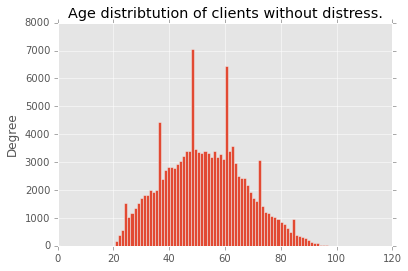

In [104]:
df.loc[df['SeriousDlqin2yrs'] == 0]['age'].plot(
    kind='hist', 
    bins=100, 
    title='Age distribtution of clients without distress.')

In [105]:
df = df[df.MonthlyIncome < 60000]

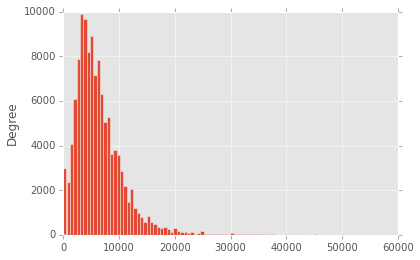

In [106]:
df['MonthlyIncome'].plot(kind='hist', bins=100)

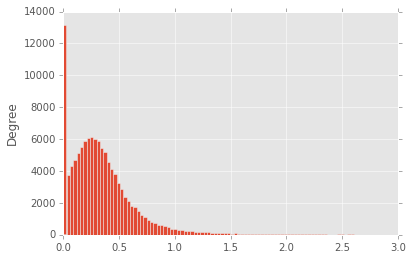

In [107]:
df = df[df.DebtRatio < 3]
df['DebtRatio'].plot(kind='hist', bins=100)

In [108]:
from sklearn.decomposition import RandomizedPCA
X = df.drop('SeriousDlqin2yrs', axis=1)
X = X.fillna(X.mean(axis=0))

In [109]:
%time X_pca = RandomizedPCA(n_components=2).fit_transform(X)
X_pca.shape

CPU times: user 326 ms, sys: 86.6 ms, total: 413 ms
Wall time: 333 ms


(117340, 2)

In [110]:
y = df.fillna(df.mean(), axis=0)['SeriousDlqin2yrs']
y.shape

(117340,)

In [111]:
from itertools import cycle
colors = ['b', 'r']
zip(np.unique(y), cycle(colors))

[(0, 'b'), (1, 'r')]

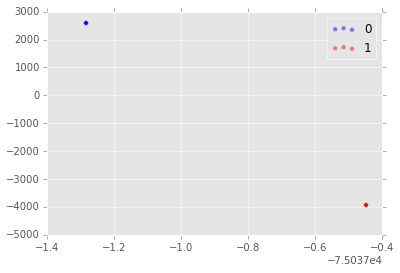

In [112]:
for i, c in zip(np.unique(y), cycle(colors)):
    plt.scatter(X_pca[y.loc[y == i], 0], X_pca[y.loc[y == i], 1], c = c, label=str(i), alpha=0.5)
    
plt.legend(loc='upper right')

In [63]:
X_pca[y.loc[y == 1], 1]

array([-3926.50179091, -3926.50179091, -3926.50179091, ..., -3926.50179091,
       -3926.50179091, -3926.50179091])

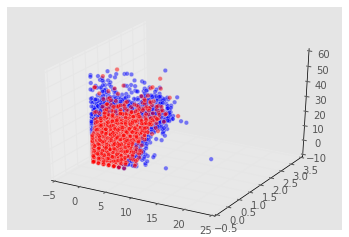

In [64]:
df_clean = df.fillna(df.mean(), axis=0)
df_distressed = df_clean.loc[df_clean['SeriousDlqin2yrs'] == 1]
df_non_distressed = df_clean.loc[df_clean['SeriousDlqin2yrs'] == 0]

three_dim_plt = plt.figure().gca(projection='3d')
three_dim_plt.scatter(df_non_distressed.NumberOfDependents, df_non_distressed['DebtRatio'], df_non_distressed.NumberOfOpenCreditLinesAndLoans, c = 'b', alpha=0.5)
three_dim_plt.scatter(df_distressed.NumberOfDependents, df_distressed['DebtRatio'], df_distressed.NumberOfOpenCreditLinesAndLoans, c = 'r', alpha=0.5)
plt.show()

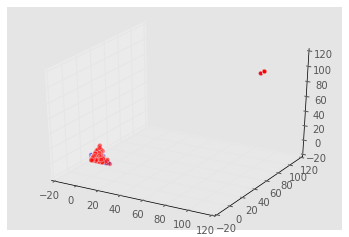

In [66]:
df = df[df['NumberOfTime30-59DaysPastDueNotWorse'] < 60]
three_dim_plt = plt.figure().gca(projection='3d')
three_dim_plt.scatter(df_non_distressed.NumberOfTimes90DaysLate, df_non_distressed['NumberOfTime30-59DaysPastDueNotWorse'], df_non_distressed['NumberOfTime60-89DaysPastDueNotWorse'], c = 'b', alpha=0.5)
three_dim_plt.scatter(df_distressed.NumberOfTimes90DaysLate, df_distressed['NumberOfTime30-59DaysPastDueNotWorse'], df_distressed['NumberOfTime30-59DaysPastDueNotWorse'], c = 'r', alpha=0.5)
plt.show()

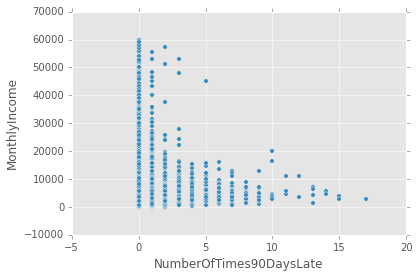

In [68]:
df.loc[df['NumberOfTimes90DaysLate'] < 80].plot(kind='scatter', x='NumberOfTimes90DaysLate', y='MonthlyIncome')

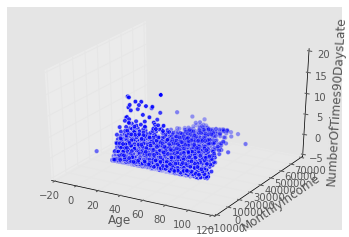

In [69]:
threed = plt.figure().gca(projection='3d')
threed.scatter(df['age'], df['MonthlyIncome'], df['NumberOfTimes90DaysLate'])
threed.set_xlabel('Age')
threed.set_ylabel('MonthlyIncome')
threed.set_zlabel('NumberOfTimes90DaysLate')
plt.show()

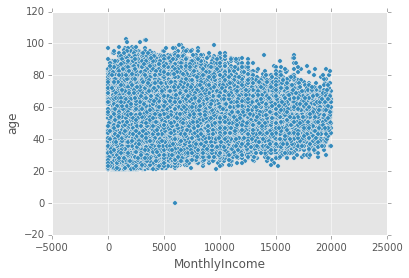

In [70]:
df.loc[df['MonthlyIncome'] < 20000].plot(kind='scatter', x='MonthlyIncome', y='age')
plt.show()